In [1]:
%pylab inline
import pandas as pd
import seaborn as sns
sns.set_color_codes()

Populating the interactive namespace from numpy and matplotlib


In [2]:
%run ../GPclust/OMGP.py

In [3]:
df = pd.read_csv('../data/split_data_test.csv')
X = np.atleast_2d(df.x).T
Y = np.atleast_2d(df.y).T

In [4]:
m = OMGP(X, Y, prior_Z='symmetric')

In [5]:
m

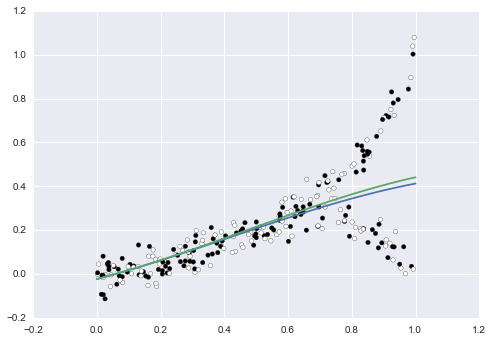

In [6]:
XX = np.atleast_2d(np.linspace(0,1)).T

YY = m.predict_components(XX)

plt.scatter(m.X, m.Y, c=np.argmax(m.phi, 1));
for i in range(m.phi.shape[1]):
    plt.plot(XX, YY[:, i]);

In [7]:
m.optimize()

iteration 14 bound=-357.387596086 grad=4.37332252037e-08, beta=0.0 vb converged (gtol)
iteration 51 bound=-375.966853226 grad=5.41300865969e-07, beta=0.605252397742 vb converged (gtol)
iteration 75 bound=-374.022757498 grad=7.40638580594e-07, beta=0.625730850129 vb converged (gtol)


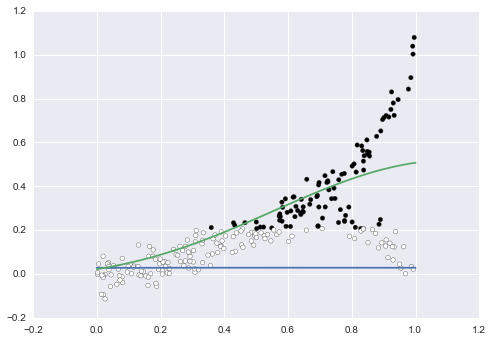

In [8]:
YY = m.predict_components(XX)

plt.scatter(m.X, m.Y, c=np.argmax(m.phi, 1));
for i in range(m.phi.shape[1]):
    plt.plot(XX, YY[:, i]);

In [9]:
m

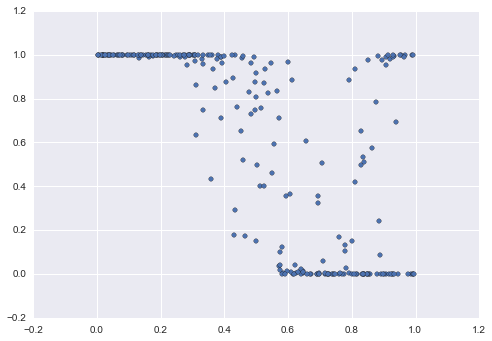

In [10]:
plt.scatter(m.X, m.phi[:,0]);